# Veri Yükleme

In [11]:
import pandas as pd
import numpy as np

file_path = 'C:/Users/emiri/OneDrive/Belgeler/GitHub/Cesitli-Denemeler/Örnek Veri Seti.xlsx'
data = pd.read_excel(file_path)

print(data.head())
print(data.info())

   Bugün kendini nasıl hissediyorsun?  \
0                                   4   
1                                   4   
2                                   7   
3                                   7   
4                                   7   

   Bugünkü eğitimde daha önce bilmediğim yeni konular öğrendim.  \
0                                                  7              
1                                                  6              
2                                                  6              
3                                                  7              
4                                                  7              

   Bugünkü deneyimini interaktiflik özelinde nasıl değerlendirirsin?  \
0                                                  7                   
1                                                  5                   
2                                                  5                   
3                                                  4          

# Veri Temizleme

In [3]:
#Eksik değerlerin tespitini sağlayalım.
missingValues = data.isnull().sum()
print("Eksik Değerler:\n", missingValues)

#Gereksiz sütünları düşürebiliriz veya doldurabiliriz. Bu sayede daha sağlıklı bir analiz sürecimiz olur.
#Mesela biz burda eksik değerimizi mod ile dolduralım.
data.fillna(data.mode().iloc[0], inplace=True)

#Temizlediğimiz veri setinin kontrolünü sağlayalım.
print(data.head())


Eksik Değerler:
 Bugün kendini nasıl hissediyorsun?                                                                       0
Bugünkü eğitimde daha önce bilmediğim yeni konular öğrendim.                                             0
Bugünkü deneyimini interaktiflik özelinde nasıl değerlendirirsin?                                        0
Bu derste not tutarken hangi metodu kullandın?                                                           0
Konuğumuzun "Yolculuk" oturumu sence nasıldı?                                                            0
Konuğumuzun "yolculuk" oturumunu nasıl bulduğunu yazılı olarak da aktarmak ister misin?                 16
Kariyerin için aldığın online eğitimleri bizimle paylaşabilir misin?                                   228
Aşağıdaki kavramlardan hangisi/hangileri hakkında bilgi sahibi oldun?                                    0
Takım çalışmasından verimli bir sonuç aldığıma inanıyorum.                                               0
Aşağıdakilerden hang

# Genel İstatistiksel Özellikler

In [4]:
#Sayısal sütünlarımız için bir takım tanımlayıcı istatistiklerimiz
print(data.describe())

#Burada kategorik sütunlarımız için frekans dağılımı yapacağız
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"{column} Sütununun Frekans Dağılımı:\n", data[column].value_counts())

       Bugün kendini nasıl hissediyorsun?  \
count                          872.000000   
mean                             5.891055   
std                              1.168202   
min                              1.000000   
25%                              5.000000   
50%                              6.000000   
75%                              7.000000   
max                              7.000000   

       Bugünkü eğitimde daha önce bilmediğim yeni konular öğrendim.  \
count                                         872.000000              
mean                                            6.163991              
std                                             1.058316              
min                                             1.000000              
25%                                             6.000000              
50%                                             7.000000              
75%                                             7.000000              
max                       

# Veri Görselleştirme

Geldik fasülyenin faydalarına :). Geçtiğimiz 3 aşama boyunca kodumuza verilerimizi aldık. Bu veriler üzerinde üstünkörü bir göz gezdirdik. Elimizde bulunamayan veya var olmayan eksik verilerimizi temizledik veya bu verileri kullanabileceğimiz şkeilde tamamladık. Son olarak da veri setimizle ilgili genel bir takım istatiklerimizi çıkarmış bulunduk. Ama bir üstteki kod dizinimizin çıktısında da gördüğünüz üzere aldığımız çıktı epey bir uzun azcık da kafa karıştırıcı. o yüzden hadi şimdi daha derinlemesine analizlerimize başlamadan önce şu çıktılarımızı biraz görselleştirelim, aklımızda daha sağlam bir yer edinsin kendileriyle dans ettiğimiz verilerimiz.

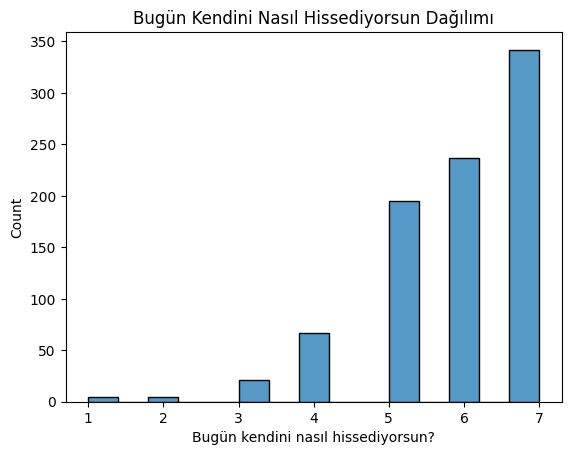

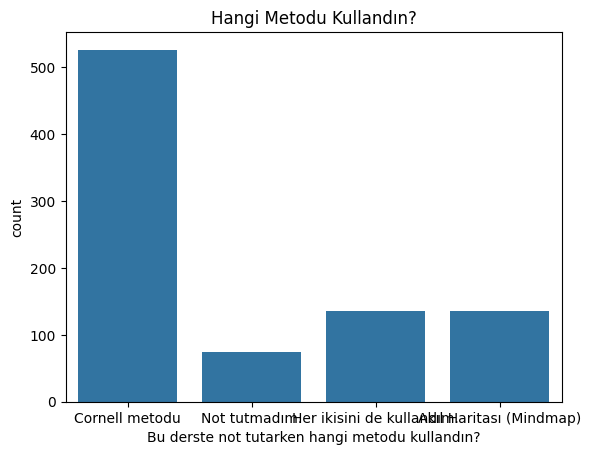

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sayısal bir sütun için histogram
sns.histplot(data['Bugün kendini nasıl hissediyorsun?'])
plt.title("Bugün Kendini Nasıl Hissediyorsun Dağılımı")
plt.show()

# Kategorik bir sütun için bar plot
sns.countplot(x='Bu derste not tutarken hangi metodu kullandın?', data=data)
plt.title("Hangi Metodu Kullandın?")
plt.show()



# Korelasyon Analizi

Evet pek değerli okuyucularım umarım keyifler yerindedir şuana kadarki süreç anlaşılır ilerliyordur. Üstteki adımımızda iki tane kategorimizin toplalarını görmüş, incelemiş bulunduk. Kod satırlarında kullandığım yönetemi kullanarak bütün kategorilerimiz için buna benzer grafikler çıkartabiliriz. Ben hem zamanınızı çok çalmamak için hem de ileride daha detaylı analizler yaptıkça daha fazla görselleştirilmiş verilerimiz olacağı için bu adımdaki görselleştirme sekansımızı kısa tuttum. Artık umuyorum ki verilerimiz ile aramız biraz daha sıkı fıkı oldu. O zaman şimdi de sayısal sütünlarımız arasındaki ilişkileri incelemek adına bir korelasyon analizi yapalım.

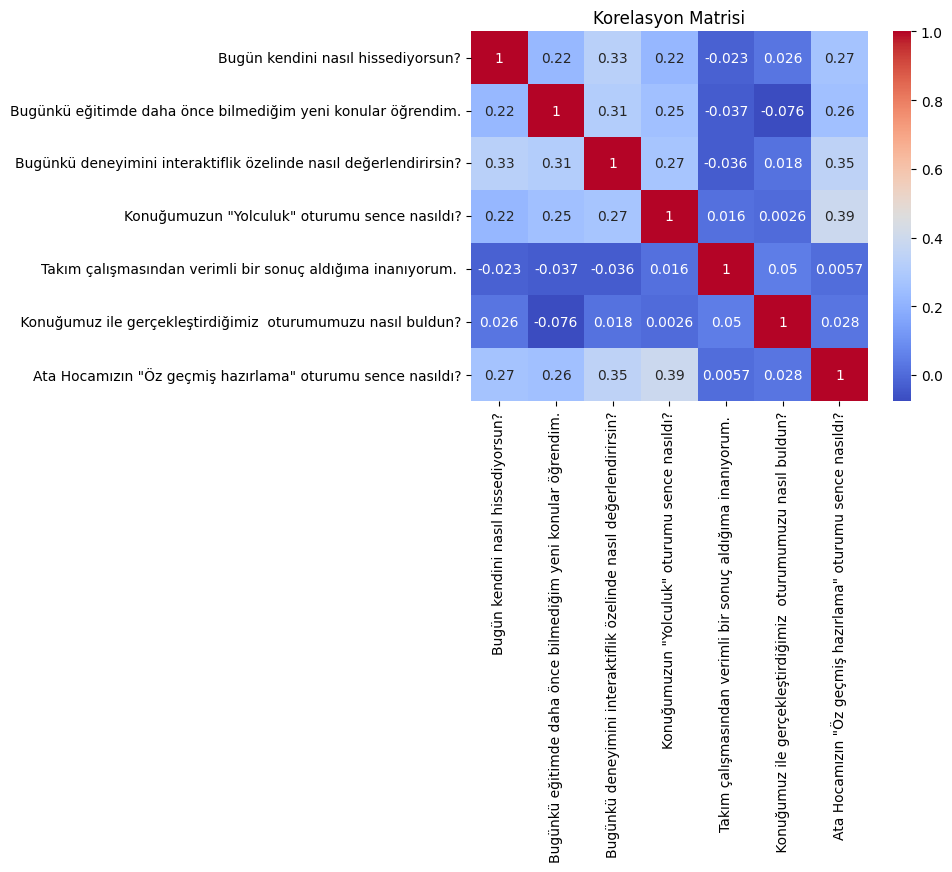

In [12]:
#Korelasyon matrisimizi oluşturmak için seçim yaparken metin(string) içeren sütunları seçimimize dahil edersek ValueError hatası ile karşılaşırız. Bundan dolayı sadece sayısal olan sütunlarımızı seçelim.
numeric_data = data.select_dtypes(include=[np.number])

#Korelasyon matrisimizi oluşturuyoruz.
correlationMatrix = numeric_data.corr()
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm')
plt.title("Korelasyon Matrisi")
plt.show()

### Not

**!!!** Korelasyon analizinin ne olduğunu biliyorsanız bu bölümü atlayabilirsiniz. **!!!**

Şimdi bakalım bu korelasyon analizi denen arkadaş ne oluyormuş. Korelasyon matrisi, bir veri setindeki değişkenlerin birbirleriyle olan ilişkilerini sayısal olarak ifade eden bir tablodur. Her bir hücre, iki değişken arasındaki korelasyon katsayısını gösterir. Bu katsayılar, -1 ile 1 arasında bir değer alır ve şu şekilde yorumlanır:
- 1: Mükemmel pozitif korelasyon. Bir değişken arttıkça, diğeri de aynı oranda artar.
- 0: Korelasyon yok. Değişkenler arasında herhangi bir doğrusal ilişki yoktur.
- -1: Mükemmel negatif korelasyon. Bir değişken arttıkça, diğeri aynı oranda azalır.

**Kolerasyon Matrisinin Çıktısı**
1. Çapraz İlişkiler: Korelasyon matrisindeki ana köşegen (sol üstten sağ alta çizgi) her zaman 1'dir çünkü her değişken kendisiyle %100 ilişkili (korelasyon = 1) olur.
2. Isı Haritası (Heatmap): Görseldeki renkler, korelasyonun derecesini ifade eder:
    - Koyu kırmızı renkler yüksek pozitif korelasyonu (yakın 1’e),
    - Koyu mavi renkler ise yüksek negatif korelasyonu (yakın -1’e) gösterir.
    - Beyaza yakın renkler ise düşük veya sıfır korelasyonu gösterir.
3. Katsayılar: Haritadaki her hücredeki sayı, iki değişken arasındaki korelasyon katsayısını ifade eder. Örneğin, eğer bir hücrede "0.85" gibi bir sayı varsa, bu, iki değişkenin oldukça güçlü bir pozitif ilişkiye sahip olduğunu gösterir.

**Neyi Göstermez**
Korelasyon, iki değişken arasındaki doğrusal ilişkiyi gösterir, ancak neden-sonuç ilişkisini (nedenselliği) göstermez. Yani yüksek bir korelasyon, bir değişkenin diğerini "neden" etkilediği anlamına gelmez.

# Regresyon Analizi

Veri setimiz ile ilgili genel analizlerimizi gerçekleştirdik. Artık genel anlamda elimizdeki verilere hakimiz ve yüzeysel de olsa verilerimiz ile ilgili sonuçlar çıkarımlar yapabiliyoruz.

Sıra geldi daha ileri düzeydeki veri analiz işlemlerimize... 

In [21]:
#Regresyon analizi yaparken bağımlı ve bağımsız değişkenlere ihtiyacımız var. Ben bu kodda yapacağım analizde bağımlı değişkenimi 'Bugün kendini nasıl hissediyorsun?' bağımsız değişkenime için de 'Bugünkü eğitimde daha önce bilmediğim yeni konular öğrendim.' , 'Bugünkü deneyimini interaktiflik özelinde nasıl değerlendirirsin?' parametrelerini seçtim.

import pandas as pd
import statsmodels.api as sm

# Excel dosyasını yükleyelim
file_path = 'C:/Users/emiri/OneDrive/Belgeler/GitHub/Cesitli-Denemeler/Örnek Veri Seti.xlsx'
data = pd.read_excel(file_path)

# Eksik verileri en sık kullanılan değerlerle dolduralım
data_filled = data.fillna(data.mode().iloc[0])

#Bağımlı Değişkenim
Y = data_filled['Bugün kendini nasıl hissediyorsun?']

#Bağımsız Değişkenim
X = data_filled[['Bugünkü eğitimde daha önce bilmediğim yeni konular öğrendim.', 
                 'Bugünkü deneyimini interaktiflik özelinde nasıl değerlendirirsin?']]

#Sabit terimimizi ekleyelim (statmodels kütüphanesi kullanıyorsak bunu manuel olarak yapmamız gerekir.)
X = sm.add_constant(X)

#Regresyon modeli oluşturalım.
model = sm.OLS(Y, X).fit()

#Modelin özetinin görelim.
model_summary = model.summary()
print(model_summary)



                                    OLS Regression Results                                    
Dep. Variable:     Bugün kendini nasıl hissediyorsun?   R-squared:                       0.126
Model:                                            OLS   Adj. R-squared:                  0.124
Method:                                 Least Squares   F-statistic:                     62.50
Date:                                Tue, 03 Sep 2024   Prob (F-statistic):           4.38e-26
Time:                                        13:42:26   Log-Likelihood:                -1313.8
No. Observations:                                 872   AIC:                             2634.
Df Residuals:                                     869   BIC:                             2648.
Df Model:                                           2                                         
Covariance Type:                            nonrobust                                         
                                                  

### Not

**!!!** Regresyon analizinin ne olduğunu biliyorsanız bu bölümü atlayabilirsiniz. **!!!**

Eee kolerasyon analizini öğrendik şimdi de regresyon analizini öğrenme vakti... Kısaca tanımlamamız gerekirse regresyon analizinde bağımsız değişkenlerin bağımlı değişken üzerindeki etkisi modellenir.

Analizimizdeki değerlerin ne olduğuna bakıcak olursak:
1. R-squared (R-kare): Bu değer, bağımsız değişkenlerin (X) bağımlı değişkeni (Y) ne kadar iyi açıkladığını gösterir. R-kare, 0 ile 1 arasında bir değerdir. 1'e ne kadar yakınsa, model o kadar iyi açıklıyor demektir.
2. Adj. R-squared (Düzeltilmiş R-kare): Bu, R-kare değerinin modeldeki bağımsız değişkenlerin sayısına göre düzeltilmiş halidir. Daha fazla bağımsız değişken ekledikçe R-kare artabilir, bu yüzden düzeltilmiş R-kare modelin daha güvenilir bir göstergesidir.
3. F-statistic (F-istatistiği): Bu istatistik, modelin genel anlamda anlamlı olup olmadığını test eder. Yani, bağımsız değişkenlerin tamamının modelde anlamlı olup olmadığını gösterir.
4. Prob (F-statistic): F-istatistiğinin anlamlı olup olmadığını gösterir. Çok düşük bir değer (0.05'ten küçük), bağımsız değişkenlerin genel olarak bağımlı değişkeni anlamlı bir şekilde etkilediğini gösterir.


Kısa bir not aramızdan sonra analizimize devam edelim...

**Modelin Genel Performansı**
    R-squared: 0.126 ve Adj. R-squared: 0.124 bu değerlere baktığımız zaman modelin bağımlı değişkenimizi açıklama gücünün düşük olduğu kanısına varabiliriz. Modelde kullandığımız bağımsız değişkenler, bağımlı değişkendeki varyansın sadece %12.6'sını açıklayabilmektedir. Bu, modelin çok güçlü bir açıklayıcı güce sahip olmadığını, dolayısıyla bağımlı değişkenin büyük kısmının modelde yer almayan başka faktörler tarafından etkilendiğini gösteriyor.

**Modelin Anlamlılığı**
    F-statistic: 62.50 ve Prob (F-statistic): 4.38e-26 bu sonuçları incelediğimizde modelin genel anlamda istatistiksel olarak anlamlı olduğunu bize gösteriyor. Bu da şu demek oluyor ki seçtiğimiz bağımsız değişkenler birlikte değerlendirildiğinde, bağımlı değişken üzerinde anlamlı bir etkiye sahip.

**Sabit Terim (Const)**
    Const: 3.2455, bağımsız değişkenlerin hepsi 0 olduğunda(modeldeki geri kalan bütün etkileri sıfırladığımızda) şahısların kendilerini nasıl hissettiğinin ortalama değeri 3.2455 olacak. Bu da bizlere bağımsız değişkenlerin modelde ne kadar etkili olduğunu anlamamız için önemli bir temel oluşturuyor.

**Modelin İç Tutarlılığı (Durbin-Watson)**
    Durbin-Watson: 2.015, hata terimlerinin birbirinden bağımsız olduğunu ve modelin iç tutarlılığının kabul edilebilir düzeyde olduğunu gösteriyor.

##### **Genel Yorum**

Bu analizimiz, eğitimde öğrenilen yeni konuların ve interaktiflik deneyiminin, kişilerin o gün nasıl hissetikleri üzerine anlamlı ancak sınırlı bir etkiye sahip olduğunu göstermektedir. Özellikle interaktiflik deneyimi, kişinin duygusal durumunu daha fazla etkiliyor gibi bir tahminde bulunabiliriz. Ancak bağımlı değişkenimizdeki varyansın büyük bir bölümü model tarafından açıklanamadığı için bu duygusal durumu etkileyen başka önemli faktörlerin de olduğu kanısına varılabilir.

Bu model, bu değişkenin bağımlı değişken üzerindeki etkisini anlamak için başlangıç noktası olarak değerlendirilebilir. Ancak daha kapsamlı bir analiz yapabilmemiz için farklı değişkenleri modelimize entegre etmek veya modelin doğruluk düzeyini arttıracak farklı istatistiksel yöntemlere başvurmak gerekcektir.

In [23]:
numeric_data = data_filled.select_dtypes(include=['int64', 'float64'])

Y = numeric_data['Bugün kendini nasıl hissediyorsun?']

X = numeric_data.drop(columns=['Bugün kendini nasıl hissediyorsun?'])

X = sm.add_constant(X)

#Backward Elimination işlemini başlatalım
pmax = 1
while(len(X.columns) > 0):
    model = sm.OLS(Y, X).fit()
    p_values = model.pvalues
    pmax = max(p_values)
    feature_with_p_max = p_values.idxmax()
    if(pmax > 0.05):
        X = X.drop([feature_with_p_max], axis=1)
    else:
        break

#Son modelimizin özetini görüntüleyelim
model_summary = model.summary()
print(model_summary)

                                    OLS Regression Results                                    
Dep. Variable:     Bugün kendini nasıl hissediyorsun?   R-squared:                       0.152
Model:                                            OLS   Adj. R-squared:                  0.148
Method:                                 Least Squares   F-statistic:                     38.89
Date:                                Tue, 03 Sep 2024   Prob (F-statistic):           5.68e-30
Time:                                        15:59:59   Log-Likelihood:                -1300.4
No. Observations:                                 872   AIC:                             2611.
Df Residuals:                                     867   BIC:                             2635.
Df Model:                                           4                                         
Covariance Type:                            nonrobust                                         
                                                  